# Clustering

Son técnicas de Machine Learning no Supervisado en los que no tenemos un target y en los que queremos agrupar los datos para encontrar patrones. Es decir, de forma automática encuentra agrupaciones o clústeres de elementos de acuerdo a una medida de similitud entre ellos. 

El objetivo fundamental de las técnicas de clustering consiste en identificar grupos o clústeres de elementos tal que:

- La similitud media entre elementos del mismo clúster sea alta. Similitud intra-clúster alta.

- La similitud media entre elementos de distintos clústeres sea baja. Similitud inter-clúster baja.





Existen varias clases de clustering según la tecnica utilizada para la separación de los grupos:
    
    - Clustering jerarquico.
    
    - Clustering de partición.

## Clustering Jerarquico

La técnica de clustering jerárquico construye un dendograma o árbol que representa las relaciones de similitud entre los distintos elementos. 

Existen dos aproximaciones diferentes al clustering jerárquico:

- **Clustering jerárquico aglomerativo:** se comienza con tantos clústeres como individuos y consiste en ir formando (aglomerando) grupos según su similitud.
- **Clustering jerárquico de división:** se comienza con un único clúster y consiste en ir dividiendo clústeres según la disimilitud entre sus componentes.

## Clustering de partición 

La técnica de clustering de partición entorno a centroides (PAM) realiza una distribución de los elementos entre un número prefijado de clústeres o grupos. Definimos el centroide de un clúster como aquel elemento que minimiza la suma de las similitudes al resto de los elementos del clúster: Esta técnica recibe como dato de entrada el número de clústers a formar además de los elementos a clasificar y la matriz de similitudes.

Definimos el centroide de un clúster como aquel elemento que minimiza la suma de las similitudes al resto de los elementos del clúster:
            
Los pasos del algoritmo son los siguientes:

- **Paso 1:** Seleccionar k centroides aleatoriamente.

- **Paso 2:** Crear k clústeres asignando cada elemento al centroide más cercano.
    
- **Paso 3:** Calcular nuevos centroides como aquellos elementos que minimizan la suma de las distancias al resto de elementos del clúster.

- **Paso 4:** Volver al paso 2 mientras haya cambio en los clústeres o se alcance un número máximo de iteraciones.


In [3]:
# import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

## Creacion de datos

In [5]:
from sklearn.datasets import make_blobs
X12 = pd.read_csv('/content/processed.csv')
X123 = X12.drop(['customerid'], axis=1)
X1 = X123.dropna()

In [6]:
X = X1.loc[:, ~X1.columns.str.contains('^Unnamed')]

# Algoritmo k-means

In [7]:
# [3] Definir modelo
kmeans = KMeans(n_clusters=3)

# [4] Entrenar modelo
kmeans.fit(X)

# [5] Generar predicciones
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 2, 2, ..., 0, 0, 2], dtype=int32)

## Elegir número óptimo de clústers

Elegir el número correcto de grupos
Muchas veces los datos con los que trabajará tendrán múltiples dimensiones, lo que dificultará la visualización. Como consecuencia, el número óptimo de grupos ya no es obvio. Afortunadamente, tenemos una forma de determinar esto matemáticamente.
Mostramos en una gráfico la relación entre el número de clusters y la Suma de cuadrados dentro del grupo (WCSS), luego seleccionamos el número de grupos donde el cambio en WCSS comienza a nivelarse (elbow method).

## Método elbow

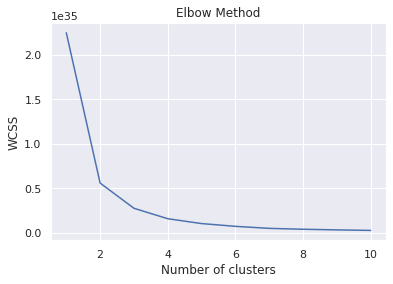

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

El número óptimo parece que sería 3-4 en este caso.

# SHILOUTTE SCORE
 .Determine the "K" value, the optimal clustering partition

In [9]:
# import libraries
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
# fit the model for the whole range and print results

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(X)
    preds = clusterer.predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7072977197806986)
For n_clusters = 3, silhouette score is 0.6434431958703264)
For n_clusters = 4, silhouette score is 0.5979479941765371)
For n_clusters = 5, silhouette score is 0.5930719223973676)
For n_clusters = 6, silhouette score is 0.5917738463014137)
For n_clusters = 7, silhouette score is 0.5975303023804862)
For n_clusters = 8, silhouette score is 0.5930614267997515)
For n_clusters = 9, silhouette score is 0.5552198116865887)
